Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [1]:
NAME = "Lucy Yang"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [2]:
#Having issues installing pandas-datareader for anaconda. Code below for pulling data from Quandl and YFinance commented out.
#Data imported from csv files.

# # all imports and env variables
# import pandas as pd
# pd.core.common.is_list_like = pd.api.types.is_list_like
# import datetime
# import pandas_datareader.data as web

# # This line of code should work on Windows and Mac
# %env QUANDL_API_KEY = "qcruXQqr_faBk3VtcPw6"

# # If the above line of code does not work on your system,
# # You can use this way of setting Quandl env variable
# import quandl
# quandl.ApiConfig.api_key = "qcruXQqr_faBk3VtcPw6"

In [3]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

# start = datetime.datetime(2013, 11, 12)
# end = datetime.datetime(2018, 11, 12)

#amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `yfinance` library

In [4]:
# import yfinance as yf
# from pandas_datareader import data as pdr

# # 1) Using pandas datareader and Yahoo Finance
# yf.pdr_override()

# amzn = pdr.get_data_yahoo('AMZN', start = start)


In [5]:
# 2) Using fix_yahoo_finance library only to download AMZN data

# amzn = yf.download('AMZN', start=start)

In [6]:
# If we want to download multipe stocks into a single dataframe:

# all_stocks_list = ['AMZN', 'FB']
# all_stocks = yf.download(all_stocks_list, start = start)

In [7]:
## TYPE YOUE CODE BELOW

#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load stock data from csv files
amzn=pd.read_csv("amzn_2012-7-31_2017-6-30.csv",  index_col=0)
fb=pd.read_csv("fb_2012-7-31_2017-6-30.csv",  index_col=0)
ibm=pd.read_csv("ibm_2012-7-31_2017-6-30.csv",  index_col=0)
mmm=pd.read_csv("mmm_2012-7-31_2017-6-30.csv",  index_col=0)

In [8]:
#examine dataframes
amzn.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,980.12,983.47,967.61,968.00,3309138.0,0.0,1.0,980.12,983.47,967.61,968.00,3309138.0
2017-06-29,979.00,987.56,965.25,975.93,4246765.0,0.0,1.0,979.00,987.56,965.25,975.93,4246765.0
2017-06-28,978.55,990.68,969.21,990.33,3708638.0,0.0,1.0,978.55,990.68,969.21,990.33,3708638.0
2017-06-27,990.69,998.80,976.00,976.78,3735360.0,0.0,1.0,990.69,998.80,976.00,976.78,3735360.0
2017-06-26,1008.50,1009.80,992.00,993.98,3347195.0,0.0,1.0,1008.50,1009.80,992.00,993.98,3347195.0


In [9]:
fb.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,151.90,151.92,150.0600,150.98,14540013.0,0.0,1.0,151.90,151.92,150.0600,150.98,14540013.0
2017-06-29,152.28,152.50,148.9175,151.04,23771610.0,0.0,1.0,152.28,152.50,148.9175,151.04,23771610.0
2017-06-28,150.92,153.47,149.8600,153.24,16621566.0,0.0,1.0,150.92,153.47,149.8600,153.24,16621566.0
2017-06-27,152.84,153.31,150.3900,150.58,19274022.0,0.0,1.0,152.84,153.31,150.3900,150.58,19274022.0
2017-06-26,156.25,156.50,153.1954,153.59,17934289.0,0.0,1.0,156.25,156.50,153.1954,153.59,17934289.0


In [10]:
ibm.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,154.28,154.50,153.14,153.83,3501395.0,0.0,1.0,151.159970,151.375521,150.043024,150.719070,3501395.0
2017-06-29,155.35,155.74,153.62,154.13,3245649.0,0.0,1.0,152.208331,152.590444,150.513317,151.013003,3245649.0
2017-06-28,155.15,155.55,154.78,155.32,2203062.0,0.0,1.0,152.012376,152.404286,151.649858,152.178938,2203062.0
2017-06-27,155.00,155.34,154.50,154.75,2385619.0,0.0,1.0,151.865409,152.198533,151.375521,151.620465,2385619.0
2017-06-26,154.71,155.75,154.63,155.23,2129945.0,0.0,1.0,151.581274,152.600242,151.502892,152.090758,2129945.0


In [11]:
mmm.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,209.91,209.910,207.85,208.19,1749132.0,0.0,1.0,208.700040,208.700040,206.651914,206.989955,1749132.0
2017-06-29,211.05,211.050,207.08,207.85,1792372.0,0.0,1.0,209.833469,209.833469,205.886353,206.651914,1792372.0
2017-06-28,210.78,211.175,210.09,210.62,1532866.0,0.0,1.0,209.565025,209.957749,208.879003,209.405948,1532866.0
2017-06-27,212.00,212.500,209.38,209.78,2226566.0,0.0,1.0,210.777993,211.275111,208.173095,208.570790,2226566.0
2017-06-26,212.79,213.470,212.31,212.61,1319058.0,0.0,1.0,211.563439,212.239520,211.086206,211.384477,1319058.0


In [12]:
#sample data for adjusted close price for end of each business month
amzn.index=pd.to_datetime(amzn.index)
amzn_adjClose=pd.DataFrame(amzn.AdjClose.resample("BM").last())
amzn_adjClose.columns=['amzn_adjClose']
amzn_adjClose.index.name="EOBM_Date"

fb.index=pd.to_datetime(fb.index)
fb_adjClose=pd.DataFrame(fb.AdjClose.resample("BM").last())
fb_adjClose.columns=['fb_adjClose']
fb_adjClose.index.name="EOBM_Date"


ibm.index=pd.to_datetime(ibm.index)
ibm_adjClose=pd.DataFrame(ibm.AdjClose.resample("BM").last())
ibm_adjClose.columns=['ibm_adjClose']
ibm_adjClose.index.name="EOBM_Date"

mmm.index=pd.to_datetime(mmm.index)
mmm_adjClose=pd.DataFrame(mmm.AdjClose.resample("BM").last())
mmm_adjClose.columns=['mmm_adjClose']
mmm_adjClose.index.name="EOBM_Date"

In [13]:
# Check for nulls
print(amzn_adjClose.isnull().sum())
print(fb_adjClose.isnull().sum())
print(ibm_adjClose.isnull().sum())
print(mmm_adjClose.isnull().sum())

amzn_adjClose    0
dtype: int64
fb_adjClose    0
dtype: int64
ibm_adjClose    0
dtype: int64
mmm_adjClose    0
dtype: int64


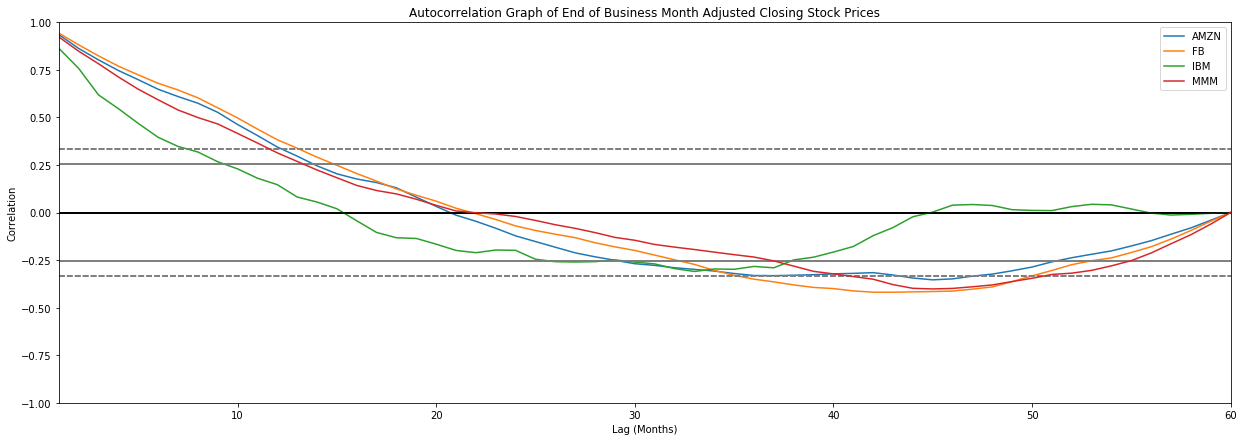

In [14]:
#plot autocorrelation for end of business month adjusted closing price for each stock
plt.figure(figsize=(21, 7))
pd.plotting.autocorrelation_plot(amzn_adjClose, label='AMZN')
pd.plotting.autocorrelation_plot(fb_adjClose, label='FB')
pd.plotting.autocorrelation_plot(ibm_adjClose, label='IBM')
pd.plotting.autocorrelation_plot(mmm_adjClose, label='MMM')
plt.xlabel('Lag (Months)')
plt.ylabel('Correlation')
plt.title('Autocorrelation Graph of End of Business Month Adjusted Closing Stock Prices')
plt.show()

In [15]:
# 4.Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices
# for each of the stocks. Are they autocorrelated?

# AMZN, FB AND MMM are positively autocorrelated uptil approximately 13 months. IBM positively autocorrelated until approximately
# 8 months of lag. After those respective lag periods, the autocorrelation for the stocks are mostly within the 99% confidence
# interval and are stastically insignificant. FB and MMM have negative autocorrelation outside of the confidence interval around
# the 30-50 months period.

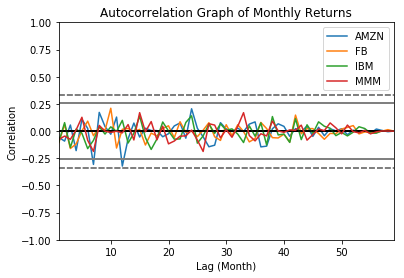

In [16]:
# 5. Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using shift() function.
# Use pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns.

amzn_monthly_return=pd.DataFrame(amzn_adjClose.diff()/amzn_adjClose.shift(1))
amzn_monthly_return.columns=['amzn_ret']

fb_monthly_return=pd.DataFrame(fb_adjClose.diff()/fb_adjClose.shift(1)*100)
fb_monthly_return.columns=['fb_ret']

ibm_monthly_return=pd.DataFrame(ibm_adjClose.diff()/ibm_adjClose.shift(1)*100)
ibm_monthly_return.columns=['ibm_ret']

mmm_monthly_return=pd.DataFrame(mmm_adjClose.diff()/mmm_adjClose.shift(1)*100)
mmm_monthly_return.columns=['mmm_ret']

pd.plotting.autocorrelation_plot(amzn_monthly_return.dropna(), label='AMZN')
pd.plotting.autocorrelation_plot(fb_monthly_return.dropna(), label='FB')
pd.plotting.autocorrelation_plot(ibm_monthly_return.dropna(), label='IBM')
pd.plotting.autocorrelation_plot(mmm_monthly_return.dropna(), label='MMM')
plt.xlabel('Lag (Month)')
plt.ylabel('Correlation')
plt.title('Autocorrelation Graph of Monthly Returns')
plt.show()

In [17]:
# Are the returns autocorrelated? Provide short explanation.

# Autocorrelation coefficients are all within 95% and all within 99% confidence interval, thus negligible for monthly returns and
# not autocorrelated. 

In [18]:
# 6. Combine all 4 time series (returns) into a single DataFrame,
# Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() 
# function from pandas.plotting). 

In [19]:
# merge adjusted close series on date
merged_monthly_return=((amzn_monthly_return.join(fb_monthly_return)).join(ibm_monthly_return)).join(mmm_monthly_return)

merged_monthly_return.head()

,amzn_ret,fb_ret,ibm_ret,mmm_ret
EOBM_Date,,,,
2012-07-31,NaN,NaN,NaN,NaN
2012-08-31,0.064166,-16.821741,-0.151981,2.147858
2012-09-28,0.024369,19.946838,6.466513,-0.194384
2012-10-31,-0.084252,-2.539243,-6.228007,-5.215321
2012-11-30,0.082256,32.638560,-1.858246,4.512319


In [20]:
# First row is null, drop row
merged_monthly_return.dropna(inplace=True)

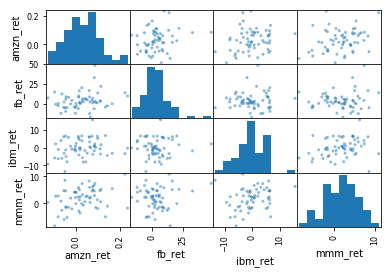

In [21]:
plt.figure(figsize=(50,50))
pd.plotting.scatter_matrix(merged_monthly_return)
plt.show()

In [22]:
#Explain the results. Is there any correlation?

# All the individual scatter plots have points all over the place, so there doesn't seem to be any significant correlation
# between the stock returns. However, IBM vs MMM returns seems to be a bit more linear.

In [23]:
# pd.DataFrame(np.cor(merged_monthly_return))
merged_monthly_return.corr()

,amzn_ret,fb_ret,ibm_ret,mmm_ret
amzn_ret,1.000000,0.212371,0.199674,0.308424
fb_ret,0.212371,1.000000,0.041273,0.096255
ibm_ret,0.199674,0.041273,1.000000,0.260762
mmm_ret,0.308424,0.096255,0.260762,1.000000


In [24]:
# AMZN vs MMM return actually has the highest correlation, but this is not clear from looking at the scatter matrix plots.